# Biodiversity in National Parks


## Introduction
The project goal is to analyze biodiversity of species in National Parks of United States of America. 

This will help to practice wrangling, tidying, visualisation and presentation of the data.

Question raised for the analysis:
+ Which animal species are mostly observed in each of parks?
+ Which park offers highest variety of different species?
+ What are the statuses of Conservation by categories of species?
+ What does each of the park has to offer by category of species?

## Load the data
`observations.csv` and `species_info.csv` are given for this project. The data holds information about species observed over last 7 days at 4 National Parks.


In [22]:
# importing all necessary modules
# data manipulation:
import pandas as pd
import numpy as np

# data visualization:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as gno

# loading the data
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

print(observations.head(7))
print(species_info.head(7))


                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal    

### Summary of the data
Using different methods, familiarize with the data in each dataframe to get the better understanding how to approach it.

First touch of the data gives information about dataframes' shape, features, data types, unique values of the features, count of missing values.


`observations` df consists of 23296 rows and 3 columns (_scientific_name_ , _park_name_, _observations_).
There are 5541 unique species, which have been observed across 4 National Parks (_Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park_).
Data types of each feature does not require change. There are no missing values in `observations` dataframe. Df is tidy and ready for analysis.


`species_info` dataframes consists of 5824 rows (each row represents unique species) and 4 columns:
+ Category - the category of animal (_Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, Nonvascular Plant_)
+ Scientific_name
+ Common names
+ Conservation status - is animal in _Species of Concern, Endangered, Threatened, In Recovery_ status.


There's no need to change any feature dtypes.
There are 5633 missing values, all of them in _Conservation status_ column. 
Those missing values respond that species are not in any kind of conservation.
96.72% of species are "Not protected". 
1. `species_info_filled` - Missing NaN values replaced with "Unknown"
2. `species_info_removed` - missing NaN values removed from df, that means a subset of less than 4% of population


Observations dataframe size:
(23296, 3)

Species info dataframe size:
(5824, 4)

Observations features` dtypes:
scientific_name    object
park_name          object
observations        int64
dtype: object

Species info features` dtypes:
category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

 Number of unique species in the observations dataframe: 5541

 Unique parks in the observations dataframe: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']

Number of NaN values in observations dataframe: scientific_name    0
park_name          0
observations       0
dtype: int64

 Species info dataframe includes these unique categories: 
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']

 Unique conservation statuses are : [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']

Number of NaN values in specie

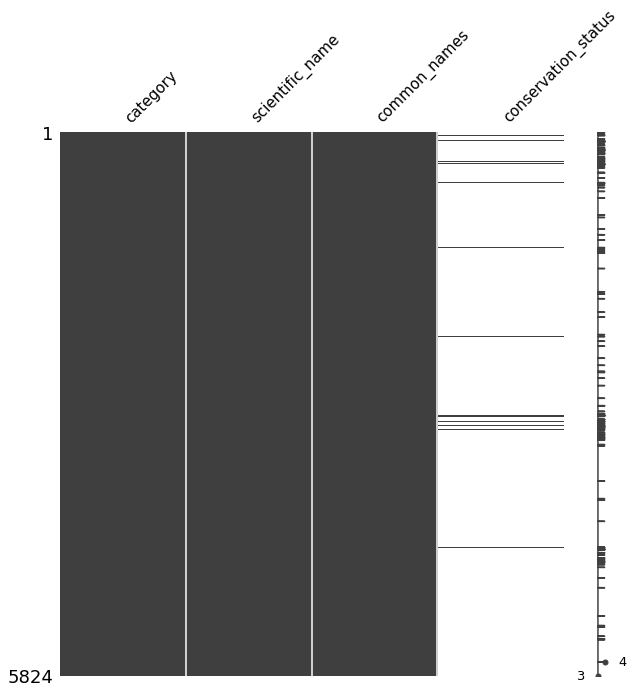

In [37]:
# size of each data frame
print("Observations dataframe size:")
print(observations.shape)
print("\nSpecies info dataframe size:")
print(species_info.shape)

# Data types of features
print("\nObservations features` dtypes:")
print(observations.dtypes)
print("\nSpecies info features` dtypes:")
print(species_info.dtypes)

# Observations dataframe:
unique_species = observations.scientific_name.nunique()
print("\n Number of unique species in the observations dataframe: " +str(unique_species))
unique_parks = observations.park_name.unique()
print("\n Unique parks in the observations dataframe: " + str(unique_parks))

obs_nNan = observations.isna().sum()
print("\nNumber of NaN values in observations dataframe: " + str(obs_nNan))

# Species info dataframe:
species_categories = species_info.category.unique()
print("\n Species info dataframe includes these unique categories: \n" + str(species_categories))
conservation_statuses = species_info.conservation_status.unique()
print("\n Unique conservation statuses are : " + str(conservation_statuses))
spc_nNan = species_info.isna().sum()
print("\nNumber of NaN values in species dataframe: " + str(spc_nNan))

# graphic of missing NaN values in species_info df
gno.matrix(species_info, figsize = (10,10), fontsize = 15, color = (0.25, 0.25, 0.25))

missing_values_ratio = (species_info.conservation_status.isna().sum() / len(species_info) * 100)
print(str(round(missing_values_ratio,2)) + ("% of conservation status values are missing"))

# creating subset dataframes: 1 with fill NaN with "Unknown", other with NaN values removed
species_info_filled = species_info.fillna("Unknown")
species_info_removed = species_info.dropna()


## Which animal species are mostly observed in each of parks?

In [70]:
# subset of each park
great_smoky = observations[observations.park_name == "Great Smoky Mountains National Park"]
yasomite = observations[observations.park_name == "Yosemite National Park"]
bryce = observations[observations.park_name == "Bryce National Park"]
yellowstone = observations[observations.park_name == "Yellowstone National Park"]

total_observations_gs = great_smoky.observations.sum()
print(total_observations_gs)
most_observed_gs = great_smoky.groupby(by=["scientific_name"]).sum().sort_values(by='observations', ascending=False)
print(most_observed_gs.head(10))
print(species_info.)

431820
                           observations
scientific_name                        
Streptopelia decaocto               256
Procyon lotor                       247
Castor canadensis                   243
Puma concolor                       239
Fragaria virginiana                 217
Holcus lanatus                      216
Microtus longicaudus                212
Apocynum androsaemifolium           210
Polygonum aviculare                 206
Sus scrofa                          205
